In [44]:
import numpy as np
import geopandas as gp
import pandas as pd
import os
import urllib2
import json
import pylab as pl
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%pylab inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('data.txt')

In [133]:
df

,OBJECTID,VALUE1,VALUE2,VALUE3,VALUE4,areaa,park_area_percentage,OBJECTID_1,OBJECTID_12,VALUE1_1,...,Count_,Sum_SHAPE_STAr,Sum_SHAPE_STLe,Sum_area,Shape_Length_1,Shape_Area_1,buffer_area,Shape_Length,Shape_Area,park_area_per_capita
0,1,10001,40974.2,75237,21898,1.713726e+07,0.022135,1,1,10001,...,17,1588155.958297,30995.737603,1588155.958379,0.178346,0.000711,7.175015e+07,0.094302,0.000170,0
1,2,10002,90802.0,33193,84070,2.449932e+07,0.106727,2,2,10002,...,95,7747670.540376,135423.351318,7747670.540682,0.233304,0.000719,7.259316e+07,0.069413,0.000243,0
2,3,10003,100073.5,94372,52161,1.607035e+07,0.041924,3,3,10003,...,90,3440069.228897,73364.604469,3440069.228917,0.116874,0.000813,8.205435e+07,0.059973,0.000159,0
3,4,10004,19996.8,130900,1774,1.530741e+07,0.098373,4,4,10004,...,63,6510587.954389,127269.506592,6510587.954649,0.380487,0.000655,6.618267e+07,0.178896,0.000152,0
4,5,10005,36062.3,122917,8456,2.026309e+06,0.177496,5,5,10005,...,21,4327858.049099,71373.661433,4327858.049027,0.124160,0.000241,2.438287e+07,0.028865,0.000020,0
5,6,10006,37055.1,125613,3465,2.554133e+06,0.125354,6,6,10006,...,22,3462007.210049,58314.546739,3462007.209949,0.110054,0.000273,2.761789e+07,0.022798,0.000025,0
6,7,10007,56842.3,185216,6655,4.442153e+06,0.100257,7,7,10007,...,37,4341894.767544,81912.037788,4341894.767444,0.107407,0.000429,4.330746e+07,0.045672,0.000044,0
7,8,10009,99427.8,57848,63754,1.718769e+07,0.101976,8,8,10009,...,79,6080781.859818,95187.361585,6080781.859913,0.140424,0.000590,5.962942e+07,0.053945,0.000170,0
8,9,10010,86594.7,101520,32657,1.063964e+07,0.062519,9,9,10010,...,39,4029929.639938,49513.405530,4029929.639877,0.124040,0.000638,6.445925e+07,0.078947,0.000105,0
9,10,10011,66580.7,99454,47058,1.844337e+07,0.026521,10,10,10011,...,45,2093776.915206,45512.691849,2093776.915267,0.176813,0.000782,7.894807e+07,0.118567,0.000183,0


In [134]:
df1 = df.loc[:,['VALUE3','VALUE4','park_area_percentage','Sum_area']]

In [138]:
df1.columns=['median_income','population','park_area_percentage','park_area']

In [136]:
df1

,median_income,population,park_area_percentage,park_area
0,75237,21898,0.022135,1588155.958379
1,33193,84070,0.106727,7747670.540682
2,94372,52161,0.041924,3440069.228917
3,130900,1774,0.098373,6510587.954649
4,122917,8456,0.177496,4327858.049027
5,125613,3465,0.125354,3462007.209949
6,185216,6655,0.100257,4341894.767444
7,57848,63754,0.101976,6080781.859913
8,101520,32657,0.062519,4029929.639877
9,99454,47058,0.026521,2093776.915267


In [139]:
df1['park_area_per_capita']=df1['park_area']/df1['population']

In [140]:
df1

,median_income,population,park_area_percentage,park_area,park_area_per_capita
0,75237,21898,0.022135,1588155.958379,72.525160
1,33193,84070,0.106727,7747670.540682,92.157375
2,94372,52161,0.041924,3440069.228917,65.950983
3,130900,1774,0.098373,6510587.954649,3670.004484
4,122917,8456,0.177496,4327858.049027,511.809135
5,125613,3465,0.125354,3462007.209949,999.136280
6,185216,6655,0.100257,4341894.767444,652.425961
7,57848,63754,0.101976,6080781.859913,95.378829
8,101520,32657,0.062519,4029929.639877,123.401710
9,99454,47058,0.026521,2093776.915267,44.493538


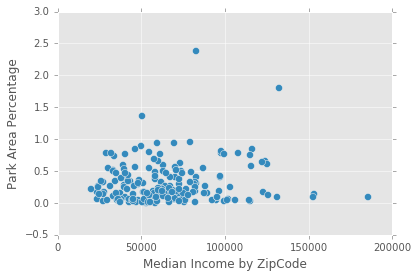

In [16]:
df1.plot(kind='scatter',x='median_income',y='park_area_percentage', marker='o', s=50)
pl.xlabel("Median Income by ZipCode") 
pl.ylabel("Park Area Percentage")   

In [24]:
df2 = df1[df1['park_area_per_capita'] < 10000]

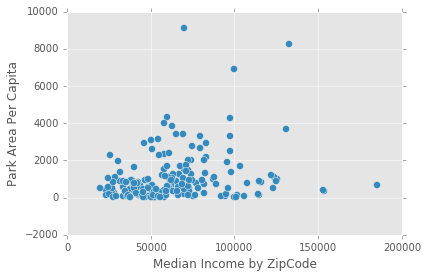

In [25]:
df2.plot(kind='scatter',x='median_income',y='park_area_per_capita', marker='o', s=50)
pl.xlabel("Median Income by ZipCode") 
pl.ylabel("Park Area Per Capita")  

In [104]:
df1 = df1[df1.park_area_percentage<1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4027
Date:                Fri, 18 Dec 2015   Prob (F-statistic):              0.527
Time:                        16:42:49   Log-Likelihood:                -1.7151
No. Observations:                 178   AIC:                             7.430
Df Residuals:                     176   BIC:                             13.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2617      0.045      5.755      0.0

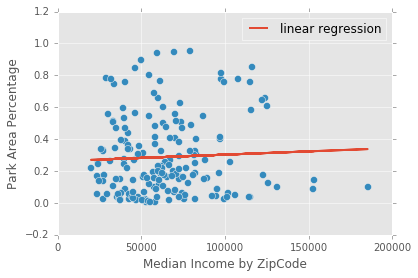

In [105]:
fit1 = smf.ols(formula = "y ~ x", data={'x':df1.median_income, 'y':df1.park_area_percentage}).fit()
print fit1.summary()


df1.plot(kind='scatter',x='median_income',y='park_area_percentage', marker='o', s=50)
plot(df1.median_income, fit1.predict(), lw=2, label="linear regression")


pl.xlabel("Median Income by ZipCode") 
pl.ylabel("Park Area Percentage")
pl.legend()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5437
Date:                Fri, 18 Dec 2015   Prob (F-statistic):              0.582
Time:                        16:57:47   Log-Likelihood:                -1.3672
No. Observations:                 178   AIC:                             8.734
Df Residuals:                     175   BIC:                             18.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.1983      0.089      2.226   

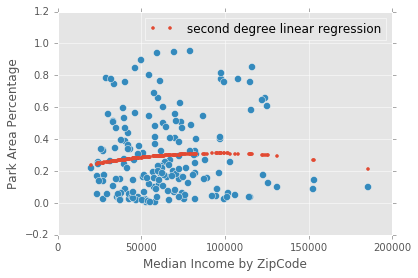

In [121]:
fit3 = smf.ols(formula = "y ~ x1 + I((x1)) + I((x1)**2)", data={'x1':df1.median_income, 'y':df1.park_area_percentage}).fit()
print fit3.summary()


df1.plot(kind='scatter',x='median_income',y='park_area_percentage', marker='o', s=50)
pl.plot(df1.median_income, fit3.predict(),'.', label=" second degree linear regression")


pl.xlabel("Median Income by ZipCode") 
pl.ylabel("Park Area Percentage")
pl.legend()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     9.071
Date:                Fri, 18 Dec 2015   Prob (F-statistic):            0.00298
Time:                        17:02:47   Log-Likelihood:                -1529.1
No. Observations:                 178   AIC:                             3062.
Df Residuals:                     176   BIC:                             3069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    408.2383    239.855      1.702      0.0

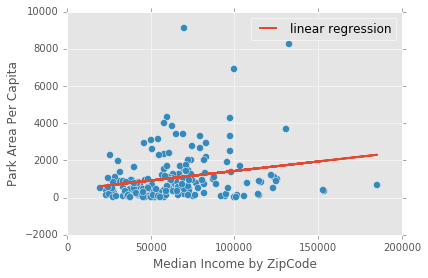

In [122]:
fit2 = smf.ols(formula = "y ~ x", data={'x':df2.median_income, 'y':df2.park_area_per_capita}).fit()
print fit2.summary()


df2.plot(kind='scatter',x='median_income',y='park_area_per_capita', marker='o', s=50)
plot(df2.median_income, fit2.predict(), lw=2, label="linear regression")


pl.xlabel("Median Income by ZipCode") 
pl.ylabel("Park Area Per Capita") 
pl.legend()


In [142]:
df2 = df1[df1.park_area_per_capita<10000]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     6.398
Date:                Fri, 18 Dec 2015   Prob (F-statistic):            0.00208
Time:                        17:16:54   Log-Likelihood:                -1527.3
No. Observations:                 178   AIC:                             3061.
Df Residuals:                     175   BIC:                             3070.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     -364.9290    472.389     -0.773   

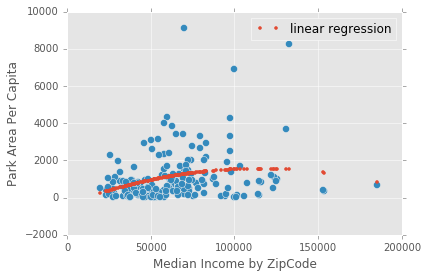

In [145]:
fit2 = smf.ols(formula = "y ~ x1 + I((x1)) + I((x1)**2)", data={'x1':df2.median_income, 'y':df2.park_area_per_capita}).fit()
print fit2.summary()


df2.plot(kind='scatter',x='median_income',y='park_area_per_capita', marker='o', s=50)
plot(df2.median_income, fit2.predict(),'.', lw=2, label="linear regression")


pl.xlabel("Median Income by ZipCode") 
pl.ylabel("Park Area Per Capita") 
pl.legend()


In [129]:
df2 = df2[df2.park_area_per_capita<3000]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.540
Date:                Fri, 18 Dec 2015   Prob (F-statistic):              0.113
Time:                        17:06:21   Log-Likelihood:                -1302.4
No. Observations:                 164   AIC:                             2609.
Df Residuals:                     162   BIC:                             2615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    579.7017    129.048      4.492      0.0

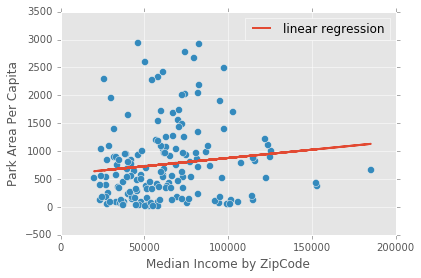

In [130]:
fit2 = smf.ols(formula = "y ~ x", data={'x':df2.median_income, 'y':df2.park_area_per_capita}).fit()
print fit2.summary()


df2.plot(kind='scatter',x='median_income',y='park_area_per_capita', marker='o', s=50)
plot(df2.median_income, fit2.predict(), lw=2, label="linear regression")


pl.xlabel("Median Income by ZipCode") 
pl.ylabel("Park Area Per Capita") 
pl.legend()


In [67]:
mean(df1.park_area_percentage)

0.31397417876188943

In [69]:
median(df1.park_area_percentage)

0.219916769364599

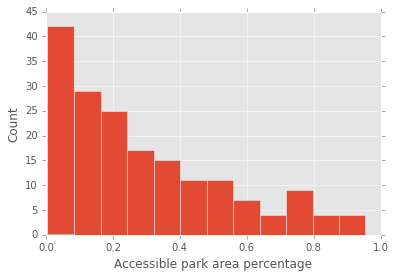

In [75]:
plt.hist(df1.park_area_percentage, bins =30);
plt.xlim(0,1)
pl.xlabel("Accessible park area percentage") 
pl.ylabel("Count")
pl.legend()
# pl.histogram(df1.park_area_per_capita, bins=10)

In [80]:
df3=df2[df2.park_area_per_capita<6000]

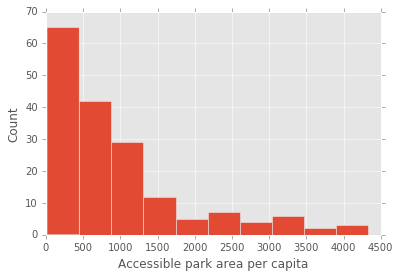

In [91]:
plt.hist(df3.park_area_per_capita, bins =10);
# plt.xlim(0,1)
pl.xlabel("Accessible park area per capita") 
pl.ylabel("Count")
pl.legend()

In [92]:
mean(df3.park_area_per_capita)

946.5924012314156

In [93]:
median(df3.park_area_per_capita)

652.42596054758712

In [148]:
std(df3.park_area_per_capita)

965.9045436446421